[Referred to https://www.kaggle.com/kaggleuser58/cipher-challenge-iii-level-1]

* The level 1 of this Cipher Challenge III is the same kind but with a key of length 4, so only 4 substitutions are used for each character mapping.
* The level 2 of this Cipher Challenge III is a transposition cipher on top of level 1.

## The cipher
- The cipher only apllies to UPPERCASE and LOWERCASE letters.
- The key only shifts every time an UPPERCASE or LOWERCASE letter is met.

## Padding
From Cipher Challenge II it was found that padding could be done both up front and in the end. Number of padding characters in the end was always equal to or at most 1 character more (if number of characters to pad with was odd) than the number of padding characters up front.

In [214]:
import numpy as np
import pandas as pd
import tqdm
from collections import Counter
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ciphertext-challenge-iii/train.csv
/kaggle/input/ciphertext-challenge-iii/test.csv
/kaggle/input/ciphertext-challenge-iii/sample_submission.csv


## Read the train, test and sub files

In [215]:
train = pd.read_csv('/kaggle/input/ciphertext-challenge-iii/train.csv', index_col='plaintext_id')
test = pd.read_csv('/kaggle/input/ciphertext-challenge-iii/test.csv', index_col='ciphertext_id')
sub = pd.read_csv('/kaggle/input/ciphertext-challenge-iii/sample_submission.csv', index_col='ciphertext_id')

In [216]:
train['length'] = train.text.apply(len)
test['length'] = test.ciphertext.apply(len)

In [250]:
display(train.head())
display(test.head(10))

,text,index,length
plaintext_id,,,
ID_d45641fc3,"come, who you are and what you would are out o...",104199,50
ID_2058482ae,For all in vain comes counsel to his ear.,79081,41
ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43
ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39
ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,46


,ciphertext,difficulty,length
ciphertext_id,,,
ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100
ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4,764
ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4,772
ID_d089e3234,AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...,4,764
ID_55f57ffd0,11241 14155 31264 11448 35128 46135 39409 3201...,3,573
ID_c85d54d74,"Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsa...",1,100
ID_d22731a2d,"1 !hek]zAxsAsD k!CN, pJlxvmQ[gpmQ'Av.m] tdI,: ...",2,100
ID_a1f8defe3,26313 3720 42782 43095 15349 49837 45407 34248...,3,576
ID_df952a0c2,BBBRplwSMcJ1V7umvVSMAqZEziFjYkFjhKLEyIW3tGCwtD...,4,760


In [218]:
level1 = test[test.difficulty==1].copy()
level2 = test[test.difficulty==2].copy()
level3 = test[test.difficulty==3].copy()
level4 = test[test.difficulty==4].copy()

display(level1.head())
display(level2.head())
display(level3.head())
display(level4.head())

,ciphertext,difficulty,length
ciphertext_id,,,
ID_4a6fc1ea9,H2-t.'HzW$QOSvkPw v)4I1iSECKPX: P ktxjkp qemfl...,1,100
ID_c85d54d74,"Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsa...",1,100
ID_a6298da09,"0W,jz:pH(z9xIENX5o[VM,!zma)]P5M rydi dnf bwhfl...",1,100
ID_e54366f76,bN0pTfe9HBIzGH[uU$g?hBd.kmIW7j.qXe kld prtht k...,1,100
ID_ac57b8817,CPuqjMj5$tOcHNthUki.'9LMNaAOErbptj ssmi rnvekw...,1,100


,ciphertext,difficulty,length
ciphertext_id,,,
ID_d22731a2d,"1 !hek]zAxsAsD k!CN, pJlxvmQ[gpmQ'Av.m] tdI,: ...",2,100
ID_b416f8259,"CiHPe hT, o6JSidir)nsWJVds1id hnpeirv:AMeYUd]b...",2,100
ID_54dda4dc9,":weI xdtU,q dgk,!Lzg ofbMeqBw le:L:tP$OD' -fWr...",2,100
ID_74374d8bb,UuvaQMzgJ1nw8NzzlSqKU4ql'I0EEHn[V]? :L2xT1NB2 ...,2,100
ID_5b1d67add,"! MMoqc,Sdt,SEw iUIxariplki$4d neYkbhvVuxgD'pk...",2,100


,ciphertext,difficulty,length
ciphertext_id,,,
ID_55f57ffd0,11241 14155 31264 11448 35128 46135 39409 3201...,3,573
ID_a1f8defe3,26313 3720 42782 43095 15349 49837 45407 34248...,3,576
ID_5888bd70c,39830 1480 527 37893 3968 1511 44352 43331 418...,3,582
ID_e7622439c,18253 48050 2621 14864 18269 33026 43099 5042 ...,3,585
ID_b877ff61a,10141 19154 30540 46902 2338 19145 527 28384 1...,3,569


,ciphertext,difficulty,length
ciphertext_id,,,
ID_9460d3380,Ah1QtVkLNcx7Q6mgvleEAqFIzyZoYkVtiKnd2Yy2t2GmoT...,4,764
ID_ac39fd360,BxBYt00fPc5zQqmls1mAFrVIzihsdFdoiKjdzZ22tWOnoT...,4,772
ID_d089e3234,AxFVtU0YMcl6R6mlvFKNFbVNziNpYkNtjKLX2Y+wsWShoT...,4,764
ID_df952a0c2,BBBRplwSMcJ1V7umvVSMAqZEziFjYkFjhKLEyIW3tGCwtD...,4,760
ID_6cb7031de,AxFZtFULNsJ7Q72xslKHEbVIxCZrcFdri67Qz523sWCgty...,4,780


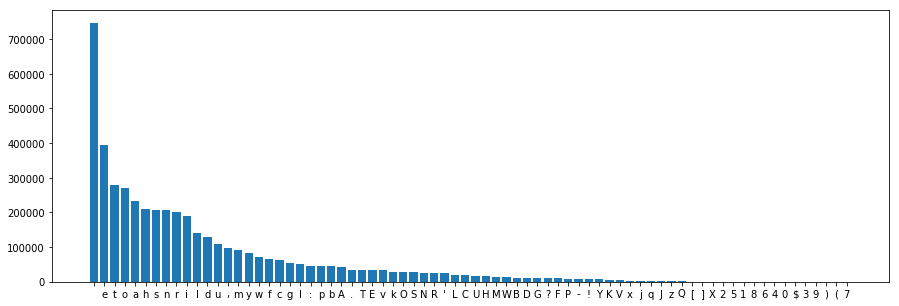

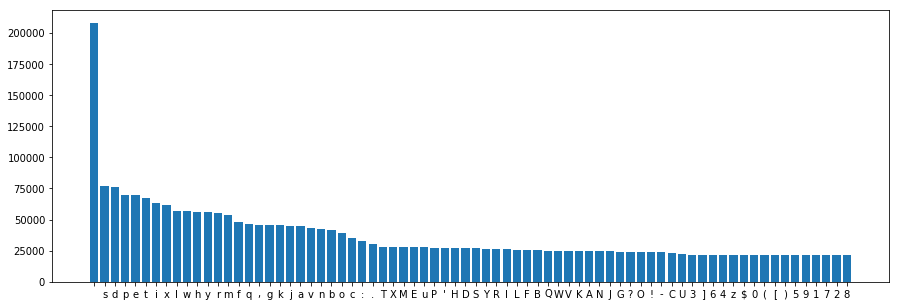

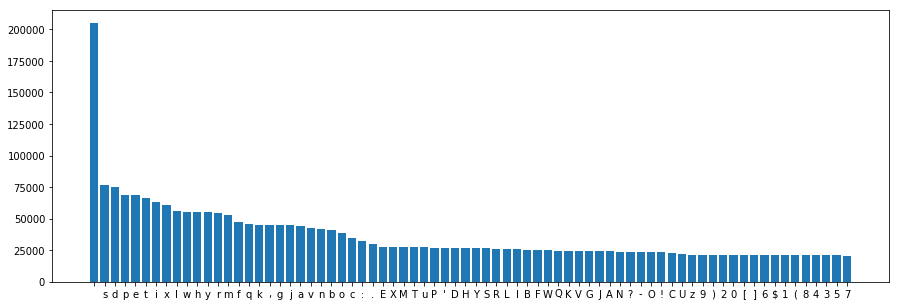

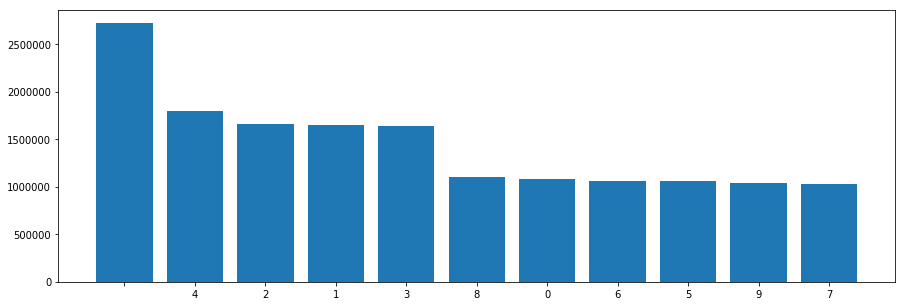

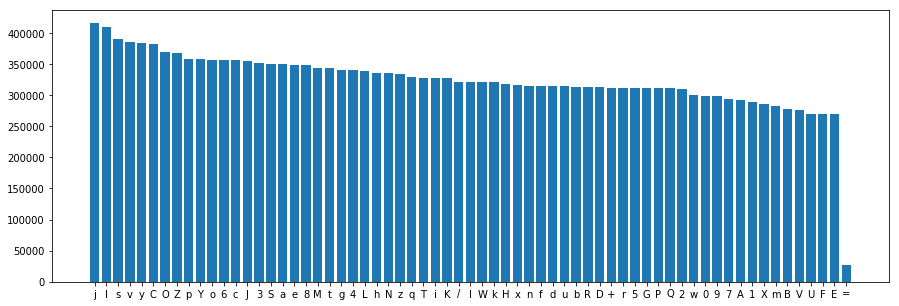

In [219]:
# plaintext
plain_char_cntr = Counter(''.join(train['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level1
plain_char_cntr = Counter(''.join(level1['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level2
plain_char_cntr = Counter(''.join(level2['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level3
plain_char_cntr = Counter(''.join(level3['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()

# level4
plain_char_cntr = Counter(''.join(level4['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values)
plt.xticks(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Letter'].values)
plt.show()



## Functions to decrypt and encrypt from/to level 1

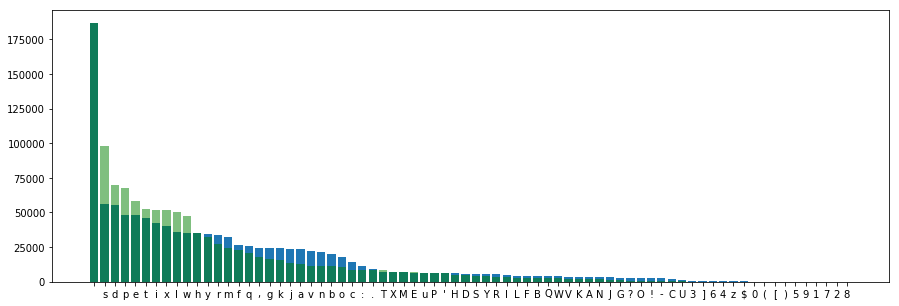

In [220]:
plain_char_cntr = Counter(''.join(train['text'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

plain_char_test = Counter(''.join(level1['ciphertext'].values))
plain_stats_test = pd.DataFrame([[x[0], x[1]] for x in plain_char_test.items()], columns=['Letter', 'Frequency'])
plain_stats_test = plain_stats_test.sort_values(by='Frequency', ascending=False)
plain_stats_test['Frequency'] -= 21130 # to remove the influence of random padding caracters

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Frequency'].values)
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values//4, alpha=.5,color='green')
plt.xticks(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Letter'].values)
plt.show()

We can see that there is **not** a match between letters, meaning that there is no direct correspondance between caracters. We have to try something else.

In [221]:
level1['length'].value_counts()

100    27120
200       28
300        8
500        1
400        1
Name: length, dtype: int64

In [222]:
display(level1[level1['length']==500])

matching_pieces = train[(train['length']>400)&(train['length']<=500)]
matching_pieces

,ciphertext,difficulty,length
ciphertext_id,,,
ID_6100247c5,"gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid s...",1,500


,text,index,length
plaintext_id,,,
ID_f000cad17,"Porter: Enter trumpets, sounding, then two Ald...",43382,488
ID_083ddb1e0,"Solemn music. Enter, as in an apparition, SIC...",31644,423
ID_a1b257ad8,"GOWER: Enter, PERICLES and SIMONIDES at one do...",76893,413


In [223]:
print('- Plaintext:\n', train.loc['ID_f000cad17']['text'])
print('- Ciphertext:\n', level1.loc['ID_6100247c5']['ciphertext'])

- Plaintext:
 Porter: Enter trumpets, sounding, then two Aldermen, Lord  Mayor, Garter, CRANMER, NORFOLK with his marshal's  staff, SUFFOLK, two Noblemen bearing great  standing-bowls for the christening-gifts, then  four Noblemen bearing a canopy, under which the  Duchess of Norfolk, godmother, bearing the child  richly habited in a mantle,  and c., train borne by a  Lady, then follows the Marchioness Dorset, the  other godmother, and Ladies. The troop pass once about the stage, and Garter speaks
- Ciphertext:
 gQUXDoBshspv: Tmfih sdycopxi, raydctrv, ssid sis Pkoihlpr, Bndh  Cyksh, Flvjdd, GHYYQTQ, YSHEAPA vtxw gtw cydwwyw'w  islju, RGJUNWO, jva Reawicdy ftydmdf rvtyf  wjyyhxmr-fevww und xwd nlhhextmtrv-ftjjr, fltm  qskq Ysqkpqtm mipqtrv y nednbd, kmoih vsmrg flt  Cggwdew ee Ysheapa, fahcnfltq, mipqtrv ssi rgtps  qtgwkk lpatxtc tr p llrjkp,  edc n., xhytr qndrt ak e  Byod, jgpr unwpeve xwd Xehbsmempwi Cavidf, xwd  axwdd kecxsjgpv, pmo Ppctii. Ssi jqasf olwi nygt ymsks flt rfevd, lrs F

It is now obvious that 1st level cipher preserves the punctuation and the case (uppercase and lowercase match), which is already a good hint. What is also striking is that the length of the words is preserved.

The 1st difficulty arises tho: words are not ciphered the same way: 'and' is either 'edc' or 'lrs' so its is not a basic matching between caracters...

Referring to https://www.kaggle.com/dierickx3/ctiii-level-1, below plot shows a full crosstab to see what maps to what and how often

![](https://www.kaggleusercontent.com/kf/18805967/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..e-x7boc-BAjDBz9tz1nTNw.qgLwQVoRjE6sg5jWdXVbDAKu7wJOqGeY7XwSVCl5pxik4oaGhnnnt4PlY4m17JQbLlshEInimDRUAEgpn9skKiwjc5r2-FAUAX1YpS07cTG3j4fUBCN_HmfC2jQvv20hwitpn-gky_R7_3hkWFWy6SDADJabcDlsGhPoXhiawJ_hpcmsYSUqMoG8RkeAn_1LkQLU-BtVxNWAXpJyoWUSW6iQOUeeHMytIG5FhKT_b55pz-t19nHo1WmnaNbE0i9GrfV36VJh10ZebwQ82rRmfuck9b3u2yodLPJBWFvLQj38JbOi10eu8iMjcq9qXnUfbmgfHIjvtrd-MdcmrJKoZiDiadcDkfHYYo4d-4SGNWqBD0zjvuTWAYATcNqeOd8hUW9hwCUUTKJUu1wSilBHWOEv--wNTkZ1tNsDhS9jFLSGY_itZzSxcYP5GutetARiB6ohxFZvjCOX-osxqSlXYuVIB3-M9RS4aCA8o8A7sZIpgJMIZyN0yv0qHNuUDD-9nbJDN216SYK71_sTIHIk3EsrBOYs_jstYlr17-5i4Uq25x0PXryav6Vf57DoKlUPL2MIG9SwdAfNmxiwv_BaltTff7FwlzCUuECNIXGwpvrZjnJcN7DAYprJn5wxhCBowyOm4EZezK5ht7AgToatCw.NuATD2u14btGskLKbKVqCw/__results___files/__results___36_0.png)


ZOOM IN ON JUST THE lowercare LETTERS AND WE SEE THAT PERHAPS "z" CHARACTERS ARE SIMPLY LEFT ALONE (LIKE PUNCTUATION, CHRACATERS, AND NUMBERS APPEAR TO BE)

![](https://www.kaggleusercontent.com/kf/18805967/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..e-x7boc-BAjDBz9tz1nTNw.qgLwQVoRjE6sg5jWdXVbDAKu7wJOqGeY7XwSVCl5pxik4oaGhnnnt4PlY4m17JQbLlshEInimDRUAEgpn9skKiwjc5r2-FAUAX1YpS07cTG3j4fUBCN_HmfC2jQvv20hwitpn-gky_R7_3hkWFWy6SDADJabcDlsGhPoXhiawJ_hpcmsYSUqMoG8RkeAn_1LkQLU-BtVxNWAXpJyoWUSW6iQOUeeHMytIG5FhKT_b55pz-t19nHo1WmnaNbE0i9GrfV36VJh10ZebwQ82rRmfuck9b3u2yodLPJBWFvLQj38JbOi10eu8iMjcq9qXnUfbmgfHIjvtrd-MdcmrJKoZiDiadcDkfHYYo4d-4SGNWqBD0zjvuTWAYATcNqeOd8hUW9hwCUUTKJUu1wSilBHWOEv--wNTkZ1tNsDhS9jFLSGY_itZzSxcYP5GutetARiB6ohxFZvjCOX-osxqSlXYuVIB3-M9RS4aCA8o8A7sZIpgJMIZyN0yv0qHNuUDD-9nbJDN216SYK71_sTIHIk3EsrBOYs_jstYlr17-5i4Uq25x0PXryav6Vf57DoKlUPL2MIG9SwdAfNmxiwv_BaltTff7FwlzCUuECNIXGwpvrZjnJcN7DAYprJn5wxhCBowyOm4EZezK5ht7AgToatCw.NuATD2u14btGskLKbKVqCw/__results___files/__results___40_0.png)

NAIVE CHARACTER TRANSLATOR USING THE CYCLICAL +4 -> +16 > +25 -> +11 CONVERSION CYCLE AS WE MOVE LEFT-TO-RIGHT THRU LETTERS THAT REQUIRE ENCRYPTED

In [224]:
KEYLEN = 4 # len('pyle')

def decrypt_level_1(ctext):
    key = [ord(c) - ord('a') for c in 'pyle']
    key_index = 0
    plain = ''
    
    for c in ctext:
        cpos = 'abcdefghijklmnopqrstuvwxy'.find(c)
        
        # lower case
        if cpos != -1:
            p = (cpos - key[key_index]) % 25     # which order(number) does this letter belongs to
            pc = 'abcdefghijklmnopqrstuvwxy'[p]  # use diff. between key and ciphert.-letter to find out plaint.-letter 
            key_index = (key_index + 1) % KEYLEN
        # upper case
        else:
            cpos = 'ABCDEFGHIJKLMNOPQRSTUVWXY'.find(c)
            if cpos != -1:
                p = (cpos - key[key_index]) % 25
                pc = 'ABCDEFGHIJKLMNOPQRSTUVWXY'[p]
                key_index = (key_index + 1) % KEYLEN
            else:
                pc = c
        plain += pc
    return plain


def encrypt_level_1(ptext, key_index=0):
    key = [ord(c) - ord('a') for c in 'pyle']
    ctext = ''
    for c in ptext:
        pos = 'abcdefghijklmnopqrstuvwxy'.find(c)
        if pos != -1:
            p = (pos + key[key_index]) % 25
            cc = 'abcdefghijklmnopqrstuvwxy'[p]
            key_index = (key_index + 1) % KEYLEN
        else:
            pos = 'ABCDEFGHIJKLMNOPQRSTUVWXY'.find(c)
            if pos != -1:
                p = (pos + key[key_index]) % 25
                cc = 'ABCDEFGHIJKLMNOPQRSTUVWXY'[p]
                key_index = (key_index + 1) % KEYLEN
            else:
                cc = c
        ctext += cc
    return ctext   

In [225]:
def test_decrypt_level_1():
    ciphertext = level1.iloc[1]['ciphertext']
    print('- Ciphertxt:\n',ciphertext)
    decrypted = decrypt_level_1(ciphertext)
    print('- Decrypted:\n',decrypted)
    encrypted = encrypt_level_1(decrypted)
    print('- Encrypted:\n',encrypted)
    print("Encrypted == Ciphertext:", encrypted == ciphertext)

test_decrypt_level_1() 

- Ciphertxt:
 Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P
- Decrypted:
 Aw4c2eg9N[[W39s5nCz'NQCY-G-XSpeak, brave Hector: we are much delighted.83 !CSoD mPcIr,7T:I)937$zg,(E
- Encrypted:
 Pv4n2iv9M[[I39w5dBz'YURX-R-CIopea, adeld Sirsav: md lvt lggw cppxfsxtc.83 !NWeC xTrHd,7X:X)937$zf,(P
Encrypted == Ciphertext: True


### Update sub with level 1 decrypted matching texts

In [226]:
# Make a dictionary for fast lookup of plaintext
plain_dict = {}
for p_id, row in train.iterrows():
    text = row['text']
    plain_dict[text] = p_id


matched, unmatched = 0, 0

for c_id, row in tqdm.tqdm(level1.iterrows()):
    decrypted = decrypt_level_1(row['ciphertext'])
    found = False
    
    for pad in range(100):
        start = pad // 2
        end = len(decrypted) - (pad + 1) // 2
        plain_pie = decrypted[start:end]
        
        if plain_pie in plain_dict:
            p_id = plain_dict[plain_pie]
            row = train.loc[p_id]
            sub.loc[c_id] = train.loc[p_id]['index']
            matched += 1
            found = True
            break
    
    if not found:
        unmatched += 1
            
print(f"Matched {matched}   Unmatched {unmatched}")

27158it [00:35, 756.92it/s]

Matched 27158   Unmatched 0


In [227]:
#sub.to_csv('submit-level-1.csv')
print("total:", len(sub))
df_q = sub.query("index != 0")
print("found:", len(df_q), ({len(df_q)/len(sub)}))

sub.to_csv('submit-level-1.csv')

total: 108755
found: 27158 {0.249717254379109}


## LEVEL 2

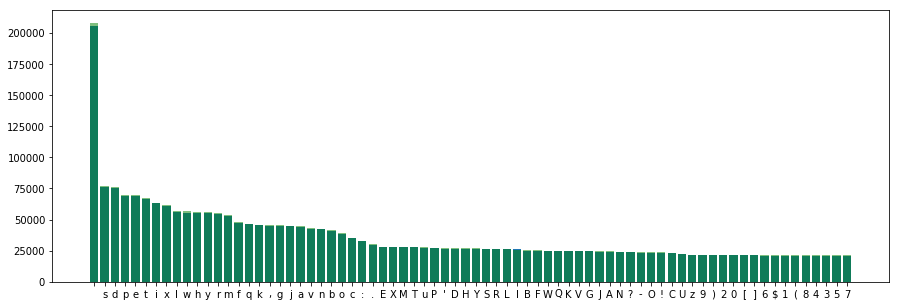

In [228]:
plain_char_cntr = Counter(''.join(level1['ciphertext'].values))
plain_stats_train = pd.DataFrame([[x[0], x[1]] for x in plain_char_cntr.items()], columns=['Letter', 'Frequency'])
plain_stats_train = plain_stats_train.sort_values(by='Frequency', ascending=False)

plain_char_test = Counter(''.join(level2['ciphertext'].values))
plain_stats_test = pd.DataFrame([[x[0], x[1]] for x in plain_char_test.items()], columns=['Letter', 'Frequency'])
plain_stats_test = plain_stats_test.sort_values(by='Frequency', ascending=False)

f, ax = plt.subplots(figsize=(15, 5))
plt.bar(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Frequency'].values)
plt.bar(np.array(range(len(plain_stats_train))) + 0.5, plain_stats_train['Frequency'].values, alpha=.5,color='green')
plt.xticks(np.array(range(len(plain_stats_test))) + 0.5, plain_stats_test['Letter'].values)
plt.show()

Notebook is based on the assumption that cipher is transpositional: ciphertext's character frequences are not changed, but are appeared in different order that text's characters. Hypotesis: this is route cipher (columnar or something like that), so we can find such patterns as names of heroes (in uppercase) in reshaped ciphertext.

In [229]:
level2['length'].value_counts()

100     26817
200        24
300         5
400         2
1100        1
Name: length, dtype: int64

In [230]:
display(level2[level2['length']==1100])

matching_pieces = train[(train['length']>1000)&(train['length']<=1100)]
matching_pieces

,ciphertext,difficulty,length
ciphertext_id,,,
ID_82377860d,"lti, xwiii yl wBdOxTLMksevm7qtsrhl ,eh,Lpn,e,'...",2,1100


,text,index,length
plaintext_id,,,
ID_07f7bb0e6,"Trumpets, sennet, and cornets. Enter two Verge...",41383,1029


In [231]:
p_id = 'ID_07f7bb0e6'
c_id = 'ID_82377860d'

In [232]:
for shift in range(4):
    train[f'text{shift}'] = (''.join(['a']*shift) + train['text']).apply(lambda x: encrypt_level_1(x)[shift:])


train.head()

,text,index,length,text0,text1,text2,text3
plaintext_id,,,,,,,
ID_d45641fc3,"come, who you are and what you would are out o...",104199,50,"rnxi, mga det lvt yyh mglx ong betwh pqp sks a...","baqt, vss ong ehd lrs vsej xay mngps ydi etf s...","nscd, ile xay pqp edc ilps ksk vaybc lvt ngx e...","gelp, bwn ksk ydi pmo bwyf det iskko ehd ayj n..."
ID_2058482ae,For all in vain comes counsel to his ear.,79081,41,Und ebk tr lytr rnxii baydrpp jn smi dlv.,Eav pkw md ulmd baqtr nskmeib sa lxr peh.,Qsh ywp xm hexm nscde getywtk fs whe ipq.,Jeq lpb hy aphy gelpw rngridw xe gtw tyd.
ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43,Rybxphy: Bxss xwd yins middqmj n' flt vtrs.,Bltjytr: Mhfl jgp rtwf ftmpjxs a' xwd imdc.,Nefslmd: Vtxw ssi ddjx qdyiuhf s' jgp bxmo.,Gpofexm: Imjg flt mpcj aprtetx e' ssi mhyh.
ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39,"Ilppbr isehykbx sihd: ys ytfxo, edmtzd,","Rxibke bentrvkk ltqp: re igxjx, qvxdzp,","Eqtkww mnamdfwd wddi: dn uyjsk, jhhpzi,","Wcdwpi vasxmrpo gpvt: ma nksfd, uqtizt,"
ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,46,"FNDXXY: Ilxbs hxc trrndteqlxt yyh cyvi kr art,","OAVJHL: Bwhnl sho mdbavfndejd lrs llot te sdd,","BSHSTE: Mgtgw cth xmnshoavpsp edc xead gw emp,","TEQFMP: Vsmrg oms hygeqbshyfi pmo qpjp yi nyi,"


In [233]:
plain = train.loc[p_id]
display(plain)

text      Trumpets, sennet, and cornets. Enter two Verge...
index                                                 41383
length                                                 1029
text0     Jqgqfdfw, idyrts, lrs bavddfw. Tmfih sis Lddkt...
text1     Sdycopxi, rprddf, edc nshmpxi. Dyxtq fbe Upvvd...
text2     Fvklbijr, eidmpx, pmo geqyijr. Prjdd xmn Hihfp...
text3     Xhtxttse, wtmyij, yyh rndrtse. Idspv jva Atqri...
Name: ID_07f7bb0e6, dtype: object

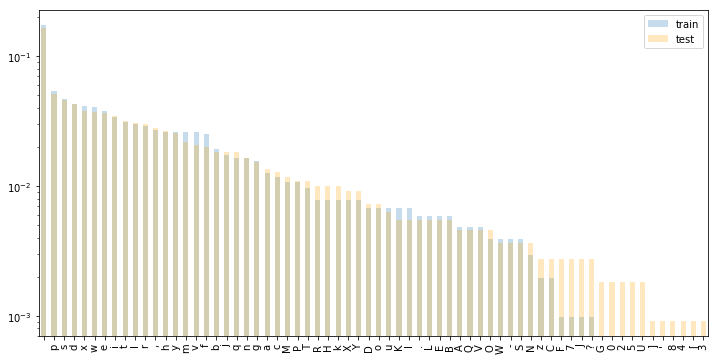

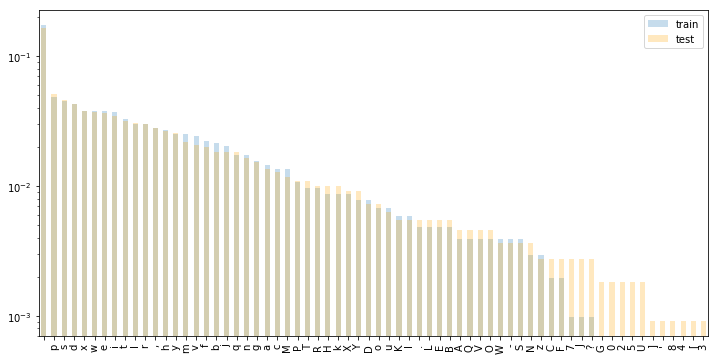

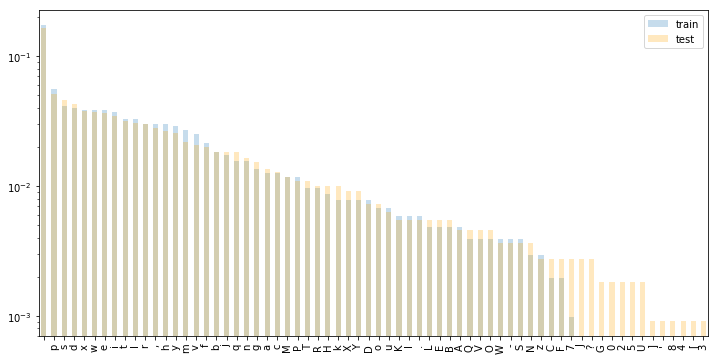

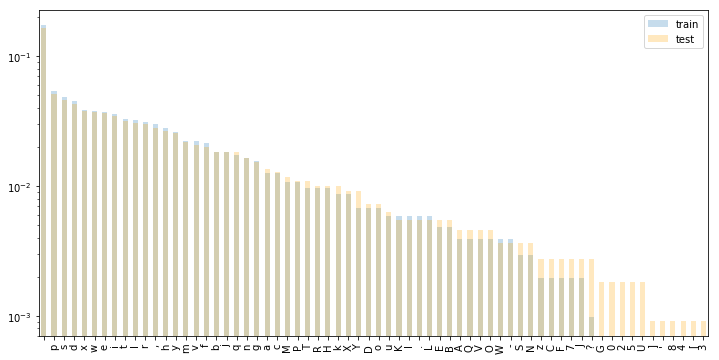

In [234]:
ciphertext = level2.loc[c_id, 'ciphertext']
s_ciphertext = pd.Series(list(ciphertext))

# text 0 
text0 = train.loc[p_id]['text0']
s_text0 = pd.Series(list(text0))

plt.figure(figsize=(12,6))
s_text0.value_counts(normalize=True).plot(kind='bar', log=True, alpha=0.25, label='train')
s_ciphertext.value_counts(normalize=True).plot(kind='bar', log=True, color='orange', alpha=0.25, label='test')
plt.legend()


# text 1
text1 = train.loc[p_id]['text1']
s_text1 = pd.Series(list(text1))

plt.figure(figsize=(12,6))
s_text1.value_counts(normalize=True).plot(kind='bar', log=True, alpha=0.25, label='train')
s_ciphertext.value_counts(normalize=True).plot(kind='bar', log=True, color='orange', alpha=0.25, label='test')
plt.legend()


# text 2
text2 = train.loc[p_id]['text2']
s_text2 = pd.Series(list(text2))

plt.figure(figsize=(12,6))
s_text2.value_counts(normalize=True).plot(kind='bar', log=True, alpha=0.25, label='train')
s_ciphertext.value_counts(normalize=True).plot(kind='bar', log=True, color='orange', alpha=0.25, label='test')
plt.legend()


# text 3
text3 = train.loc[p_id]['text3']
s_text3 = pd.Series(list(text3))

plt.figure(figsize=(12,6))
s_text3.value_counts(normalize=True).plot(kind='bar', log=True, alpha=0.25, label='train')
s_ciphertext.value_counts(normalize=True).plot(kind='bar', log=True, color='orange', alpha=0.25, label='test')
plt.legend()

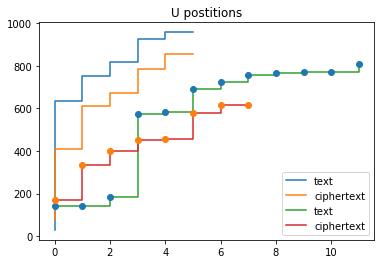

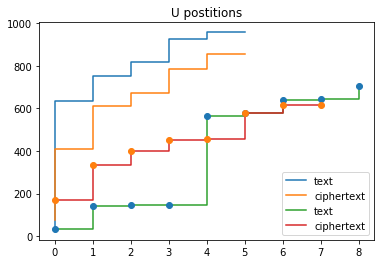

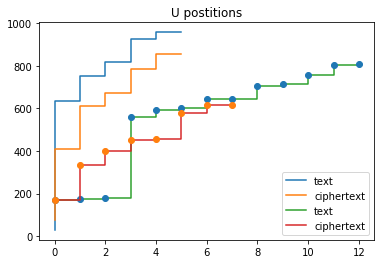

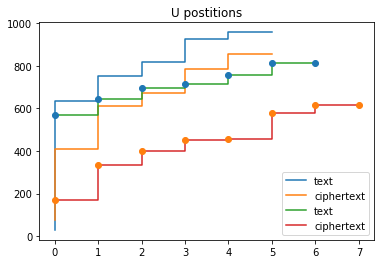

In [235]:
def plot_punc(text):
    
    plt.title('Letter postitions')
    
    dot_p = [pos for pos, char in enumerate(text) if char == '.']
    dot_c = [pos for pos, char in enumerate(ciphertext) if char == '.']
    plt.step(range(len(dot_p)), dot_p, label='. text')
    plt.step(range(len(dot_c)), dot_c, label='. ciphertext')
    """
    comma_p = [pos for pos, char in enumerate(text) if char == ',']
    comma_c = [pos for pos, char in enumerate(ciphertext) if char == ',']
    plt.step(range(len(comma_p)), comma_p, label='text')
    plt.step(range(len(comma_c)), comma_c, label='ciphertext')
    plt.show()
    """
    U_p = [pos for pos, char in enumerate(text) if char == 'D']
    U_c = [pos for pos, char in enumerate(ciphertext) if char == 'D']
    plt.step(range(len(U_p)), U_p, where='post', label='D text')
    plt.plot(range(len(U_p)), U_p, 'C0o')
    plt.step(range(len(U_c)), U_c, where='post', label='D ciphertext')
    plt.plot(range(len(U_c)), U_c, 'C1o')
    plt.legend()
    plt.show()

plot_punc(text0)
plot_punc(text1)
plot_punc(text2)
plot_punc(text3)

We know level 2 is a transposition cipher so,

1. Run the encryption method with different rails.
1. Check if the output contains a piece of the target ct.
    If it is the case then we got the rail, in this case it is 21.

In [236]:
import math
from itertools import cycle

def rail_pattern(n):
    r = list(range(n))
    return cycle(r + r[-2:0:-1])

def encrypt_level_2(plaintext, rails=21):
    p = rail_pattern(rails)
    return ''.join(sorted(plaintext, key=lambda i: next(p)))

def decrypt_level_2(ciphertext, rails=21):
    p = rail_pattern(rails)
    indexes = sorted(range(len(ciphertext)), key=lambda i: next(p))
    result = [''] * len(ciphertext)
    
    for i, c in zip(indexes, ciphertext):
        result[i] = c
    
    return ''.join(result)

In [237]:
def test_decrypt_level_2():
    ciphertext = level2.iloc[1]['ciphertext']
    print('- Ciphertxt:\n',ciphertext)
    decrypted = decrypt_level_1(decrypt_level_2(ciphertext))
    print('- Decrypted:\n',decrypted)
    encrypted = encrypt_level_2(encrypt_level_1(decrypted))
    print('- Encrypted:\n',encrypted)
    print("Encrypted == Ciphertext:", encrypted == ciphertext)


test_decrypt_level_2() 

- Ciphertxt:
 CiHPe hT, o6JSidir)nsWJVds1id hnpeirv:AMeYUd]b,BCC U3Wjnpdpmqp)', pvHrebas!bpmdKkvvWa r]hGo LdEiqEup
- Decrypted:
 MQ,H)RnfOyMXe'DdeLdnvSCkL!g,itD]Be now as prodigal of all dear gracelaV,Nrx1Xw6dRUXnTje:QL3e)kvww]AA
- Encrypted:
 CiHPe hT, o6JSidir)nsWJVds1id hnpeirv:AMeYUd]b,BCC U3Wjnpdpmqp)', pvHrebas!bpmdKkvvWa r]hGo LdEiqEup
Encrypted == Ciphertext: True


In [238]:
matched, unmatched = 0, 0

for c_id, row in tqdm.tqdm(test[test['difficulty']==2].iterrows()):
    decrypted = decrypt_level_1(decrypt_level_2(row['ciphertext']))
    found = False
    for pad in range(100):
        start = pad // 2
        end = len(decrypted) - (pad + 1) // 2
        plain_pie = decrypted[start:end]
        if plain_pie in plain_dict:
            p_id = plain_dict[plain_pie]
            row = train.loc[p_id]
            sub.loc[c_id] = train.loc[p_id]['index']
            matched += 1
            found = True
            break
    if not found:
        unmatched += 1
        print(decrypted)
            
print(f"Matched {matched}   Unmatched {unmatched}")

26849it [00:38, 704.05it/s]

Matched 26849   Unmatched 0


In [239]:
#sub.to_csv('submit-level-1.csv')
print("total:", len(sub))
df_q = sub.query("index != 0")
print("found:", len(df_q), ({len(df_q)/len(sub)}))

sub.to_csv('submit-level-2.csv')

total: 108755
found: 54007 {0.4965932600799963}


In [240]:
sub.head(10)

,index
ciphertext_id,
ID_2a3ea0caa,69027
ID_ddbd3b32d,0
ID_fa75bb12c,0
ID_df7c283c0,0
ID_6d46ecc92,0
ID_351302701,0
ID_f4b1eb3b3,0
ID_834a49d04,31823
ID_f69ac71c1,0


In [241]:
train = train.drop(['text0', 'text1', 'text2', 'text3'], axis=1)
train.head()

,text,index,length
plaintext_id,,,
ID_d45641fc3,"come, who you are and what you would are out o...",104199,50
ID_2058482ae,For all in vain comes counsel to his ear.,79081,41
ID_5257a6819,Captain: With the next benefit o' the wind.,31234,43
ID_cd22c9b7c,"Smells wooingly here: no jutty, frieze,",56215,39
ID_dad4a8a96,"PORTIA: Which did incorporate and make us one,",47149,46


# Level 3 and level 4 - exploration

In [242]:
level3["nb"] = level3["ciphertext"].apply(lambda x: len(x.split(" ")))
display(level3.sort_values("length", ascending=False).head(5))

,ciphertext,difficulty,length,nb
ciphertext_id,,,,
ID_f0989e1c5,42991 17994 23697 24006 47005 43397 5670 2971 ...,3,4050,700
ID_56f09bb72,19415 11851 23233 1077 32359 5323 34986 42561 ...,3,2895,500
ID_6a40e7018,19828 45120 30442 32079 44281 43186 40593 4181...,3,2882,500
ID_11070f053,6714 43253 18220 25395 16030 9339 5083 42944 4...,3,1732,300
ID_dfc6280e7,31965 19680 5343 42985 43071 48050 1770 27937 ...,3,1728,300


In [243]:
display(level3['nb'].value_counts())

display(level3[level3['nb']==700])

matching_pieces = train[(train['length']>600)&(train['length']<=700)]
matching_pieces

100    27363
200       45
300        5
500        2
700        1
Name: nb, dtype: int64

,ciphertext,difficulty,length,nb
ciphertext_id,,,,
ID_f0989e1c5,42991 17994 23697 24006 47005 43397 5670 2971 ...,3,4050,700


,text,index,length
plaintext_id,,,
ID_d702c9c75,"Enter a King and a Queen very lovingly, the Qu...",34509,671


In [244]:
c_id = "ID_f0989e1c5"
p_id = "ID_d702c9c75"

sub.loc[c_id] = train.loc[p_id]['index']


#sub.to_csv('submit-level-1.csv')
print("total:", len(sub))
df_q = sub.query("index != 0")
print("found:", len(df_q), ({len(df_q)/len(sub)}))

sub.to_csv('submit-level-3.csv')



sub.head()

total: 108755
found: 54008 {0.4966024550595375}


,index
ciphertext_id,
ID_2a3ea0caa,69027
ID_ddbd3b32d,0
ID_fa75bb12c,0
ID_df7c283c0,0
ID_6d46ecc92,0


No one number appears more than three times, so it's definitely not a one-to-one mapping!

But we can at least use those repeated numbers to identify the correct level 2 encryption for this one ciphertext example. Specifically: for each repeated number, we can look at what characters it maps to in each of the four possible level 2 texts; the correct decryption should hopefully exhibit some sort of regular pattern.

We do this for the top five numbers from above:

# Level 3 - mapping for few pairs
## 3 easy pairs
Assume that one number is associated to only a single char, let's find 2 pontential matches as listed above.

In [245]:
def is_correct_mapping(ct_l2, ct_l3):
    tmp = pd.DataFrame([(c,n) for c,n in zip(list(ct_l2), ct_l3.split(" ")) if c.isalpha()])
    tmp.drop_duplicates(inplace=True)
    tmp.columns = ["ch", "num"]
    tmp = tmp.groupby("num")["ch"].nunique()
    return tmp.shape[0] == tmp.sum()

def pad_str(s, special_char = '?'):
    nb = len(s)
    nb_round = math.ceil(nb / 100) * 100
    nb_left = (nb_round - nb) // 2
    nb_right = nb_round - nb - nb_left
    
    left_s = ''.join([special_char] * nb_left)
    right_s = ''.join([special_char] * nb_right)
    return left_s + s + right_s

def is_correct_mapping_low(pt, ct):
    all_ct_l2 = [encrypt_level_2(encrypt_level_1(pad_str(pt), key_index)) for key_index in range(4)]

    for i, ct_l2 in enumerate(all_ct_l2):
        if is_correct_mapping(ct_l2, ct):
            return i
    return -1

def find_mapping(ciphertext_id, ct, train_df):
    nb = len(ct.split(" "))
    nb_low = ((nb // 100) - 1) * 100
    
    rs = []
    selected_rows = train_df[(train_df["length"] > nb_low) & (train_df["length"] < nb)]
    for row_id, row in selected_rows.iterrows():
        pt = row["text"]
        key_index = is_correct_mapping_low(pt, ct)
        if key_index >= 0:
            t = row["index"], key_index
            rs.append(t)
    if len(rs) == 1:
        return rs[0]
    return -1, -1

In [247]:
for ciphertext_id, row in level3[level3["nb"] >= 200].iterrows():
    ct = row["ciphertext"]
    index, key_index = find_mapping(ciphertext_id, ct, train)
    if index > 0:
        print(ciphertext_id, index, key_index, "(length: {})".format(row["nb"]))
        sub.loc[ciphertext_id] = index # train.loc[p_id]['index']

ID_2ceb8ea72 47443 0 (length: 300)
ID_e7512f7f3 69767 0 (length: 200)
ID_646c77acc 80029 1 (length: 200)
ID_f0989e1c5 34509 3 (length: 700)
ID_6a40e7018 76893 2 (length: 500)
ID_4c796f25a 37571 2 (length: 200)
ID_56f09bb72 31644 3 (length: 500)


In [248]:
print("total:", len(sub))
df_q = sub.query("index != 0")
print("found:", len(df_q), ({len(df_q)/len(sub)}))

sub.to_csv('submit-level-2-plus.csv')

total: 108755
found: 54014 {0.4966576249367845}


# Further exploration

kaggleuser58: Have you tried finding the corresponding plaintext letters for each group and see if you can see something if you sort the groups in the correct order - it might help in finding the solution.


In [ ]:
dict_level3 = {}
for ciphertext_id, row in test3[test3["nb"] >= 200].iterrows():
    ct = row["ciphertext"]
    index, key_index = find_mapping(ciphertext_id, ct, train34)
    if index > 0:
        print(ciphertext_id, index, key_index, "(length: {})".format(row["nb"]))
        dict_level3[ciphertext_id] = (index, key_index) # train.loc[p_id]['index']

In [ ]:
dict_level3["ID_11070f053"] = (40234, 1)
dict_level3["ID_c1694eb06"] = (43773, 3)

for ciphertext_id, (index, key_index) in dict_level3.items():
    sub.loc[ciphertext_id] = index
    
print(sub[sub["index"] > 0].shape[0], sub[sub["index"] > 0].shape[0]/sub.shape[0])
sub.to_csv('submit-level-2-plus2.csv')
sub.head(3)

In [ ]:
df_mapping = []
special_chars = "?"

def get_mapping(ct_l2, ct):
    tmp = pd.DataFrame([(c,n) for c,n in zip(list(ct_l2), ct.split(" ")) if c not in special_chars])
    tmp.drop_duplicates(inplace=True)
    tmp.columns = ["ch", "num"]
    return tmp

for ciphertext_id, (index, key_index) in dict_level3.items():
    ct = test3.loc[ciphertext_id]["ciphertext"]
    pt = train34[train34["index"]==index]["text"].values[0]
    ct_l2 = encrypt_level_2(encrypt_level_1(pad_str(pt), key_index))
    print(len(ct.split(" ")), len(pt))
    tmp = get_mapping(ct_l2, ct)
    df_mapping.append(tmp)

df_mapping = pd.concat(df_mapping)
print(df_mapping.shape)
df_mapping.head(3)
df_mapping.reset_index(drop=True, inplace=True)
df_mapping.tail(3)

In [ ]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 5000)
pd.set_option('display.width', 5000)

df_ch_num = df_mapping[["ch", "num"]].drop_duplicates().groupby("ch")["num"].apply(list)
df_ch_num = df_ch_num.to_frame("num").reset_index()
df_ch_num["num"] = df_ch_num["num"].apply(lambda x: np.sort([int(n) for n in x]))
df_ch_num["num_alpha"] = df_ch_num["num"].apply(lambda x: np.sort([str(n) for n in x]))
df_ch_num["num_hex"] = df_ch_num["num"].apply(lambda x: np.sort([hex(n) for n in x]))
df_ch_num